This notebook explores how screen size relates to sales price. After doing some deeper digging, I don't want to make strong conclusions about how size relates to title and description.
- Bigger laptops sell for more.
- It *seems* including size in title increases sales price overall, but see below.
- Description effects mirror title, but they're more subtle.

In [1]:
import pandas as pd

laptopData = pd.read_csv("fulldataset.csv", encoding = 'ISO-8859-1')

#since we're visualizing data in connection with size, drop missing values for size. also, group 13.3" with 13", and 15.4" with 15".
laptopData = laptopData.dropna(subset=['size'])
laptopData.head()

,itemId,description,year,size,memory,containsDescription,title,condition,price,watchCount,...,used_in_description,used_in_title,year_in_description,year_in_title,size_in_description,size_in_title,memory_in_description,memory_in_title,n_words_in_description,n_words_in_title
0,NaN,NaN,2011.0,17.0,16.0,0,"Used Apple MacBook Pro 17 Inch, 2.2GHz quad-co...",NaN,700.0,NaN,...,False,True,False,False,False,True,False,True,0,12
1,NaN,Used Space Gray Macbook pro 15' (2017) with To...,2017.0,15.0,16.0,1,Used Space Gray Macbook pro 15' (2017) with To...,NaN,1000.0,NaN,...,True,True,True,True,True,True,False,False,19,9
2,NaN,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,2011.0,17.0,80.0,1,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,NaN,310.0,NaN,...,True,True,True,True,True,True,False,False,354,15
3,2.940000e+11,I have a beautiful MacBook Pro for sale. It ha...,2009.0,15.0,120.0,1,Apple MacBook Pro OSX 2016 2.53GHz 4GB 120GB S...,Seller refurbished,300.0,7.0,...,True,False,False,False,True,True,True,True,286,13
4,2.750000e+11,MacBook Pro 13inch (Early 2011) in great condi...,2011.0,13.0,120.0,1,MacBook Pro 13-inch Early 2011 120GB SSD/10GB RAM,Used,249.0,2.0,...,False,False,True,True,True,True,True,True,906,7


As we might expect, the larger the screen size, the higher the final selling price:

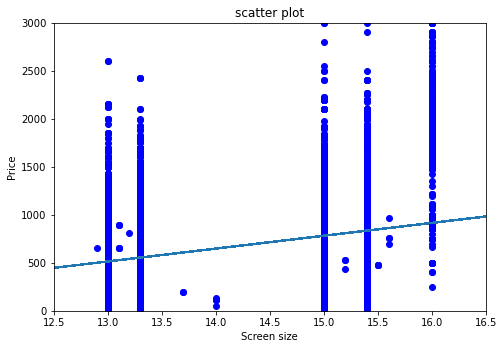

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, b = np.polyfit(laptopData["size"], laptopData["price"], 1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(laptopData["size"], laptopData["price"], color='b')
ax.set_xlabel('Screen size')
ax.set_ylabel('Price')
ax.set_title('scatter plot')
plt.plot(laptopData["size"], m*laptopData["size"] + b)
plt.xlim(12.5, 16.5)
plt.ylim(0, 3000)
plt.show()

It seems that including screen size in the title is associated with higher sales price across 13" and 15" screens, but with the complication that those reporting as 13.3"/15.4" are exceptional:

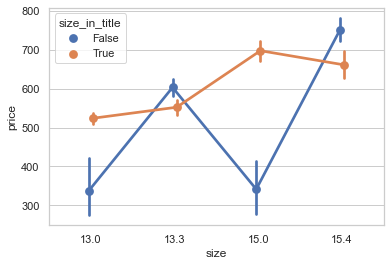

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")

laptopData2 = laptopData[(laptopData['size'] == 13) | (laptopData['size'] == 13.3) | (laptopData['size'] == 15) | (laptopData['size'] == 15.4)]

ax = sns.pointplot(x="size", y="price", hue="size_in_title", dodge=True, data=laptopData2)

As for those 16" laptops, there isn't enough data on cases where the seller left out the size from the title—there have only been three such cases!

In [4]:
laptopData2 = laptopData[(laptopData['size'] == 16) & (laptopData['size_in_title'] == False)]
len(laptopData2)

3

Including size in the *description* also yields an effect, though more subtle:

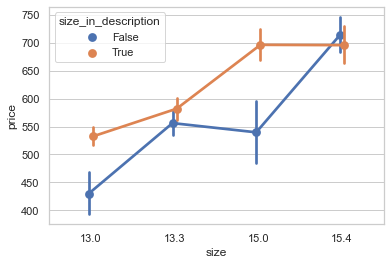

In [5]:
laptopData2 = laptopData[(laptopData['size'] == 13) | (laptopData['size'] == 13.3) | (laptopData['size'] == 15) 
                    | (laptopData['size'] == 15.4)]

ax = sns.pointplot(x="size", y="price", hue="size_in_description", dodge=True, data=laptopData2)

And no effect for 16" screens:

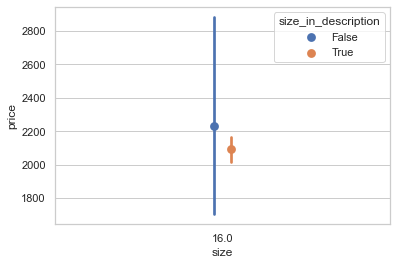

In [6]:
laptopData2 = laptopData[(laptopData['size'] == 16)]

ax = sns.pointplot(x="size", y="price", hue="size_in_description", dodge=True, data=laptopData2)